## Coil 2000 Dataset

The data collected is from an online source which is supplied by Dutch data mining company Sentient Machine Research. It is categorized as training, testing and target data:
a.  ticdata2000.txt - Training data. 
b.  ticeval2000.txt - Testing data. 
c.  tictgts2000.txt - Targets for the test data. 
d.  data dictionary - Attributes of the data

The data also has information on whether the customers have caravan insurance or not. The target data is to be used during testing to interpret prediction performance.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Reading the training file
coil = pd.read_csv('dataset/ticdata2000.txt', delimiter='\s+', encoding="utf-8")
coil.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [2]:
# Reading the eval file
coil_eval = pd.read_csv("dataset/ticeval2000.txt", delimiter='\s+', encoding="utf-8")
# dataset_tgts = pd.read_csv("{}/data/tictgts2000.txt".format(os.getcwd()),sep='\s+')
coil_eval["CARAVAN"].fillna(0, inplace = True) 
coil_eval.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250,0.0
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358,0.0
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.0


In [3]:
# Reading the target file
coil_target = pd.read_csv("dataset/tictgts2000.txt", delimiter='\s+', encoding="utf-8")

In [4]:
len(coil.columns)

86

In [5]:
len(coil_eval.columns)

86

In [6]:
# checking the percentage of missing values in each variable
coil.isnull().sum()/len(coil)*100

MOSTYPE     0.0
MAANTHUI    0.0
MGEMOMV     0.0
MGEMLEEF    0.0
MOSHOOFD    0.0
MGODRK      0.0
MGODPR      0.0
MGODOV      0.0
MGODGE      0.0
MRELGE      0.0
MRELSA      0.0
MRELOV      0.0
MFALLEEN    0.0
MFGEKIND    0.0
MFWEKIND    0.0
MOPLHOOG    0.0
MOPLMIDD    0.0
MOPLLAAG    0.0
MBERHOOG    0.0
MBERZELF    0.0
MBERBOER    0.0
MBERMIDD    0.0
MBERARBG    0.0
MBERARBO    0.0
MSKA        0.0
MSKB1       0.0
MSKB2       0.0
MSKC        0.0
MSKD        0.0
MHHUUR      0.0
           ... 
PGEZONG     0.0
PWAOREG     0.0
PBRAND      0.0
PZEILPL     0.0
PPLEZIER    0.0
PFIETS      0.0
PINBOED     0.0
PBYSTAND    0.0
AWAPART     0.0
AWABEDR     0.0
AWALAND     0.0
APERSAUT    0.0
ABESAUT     0.0
AMOTSCO     0.0
AVRAAUT     0.0
AAANHANG    0.0
ATRACTOR    0.0
AWERKT      0.0
ABROM       0.0
ALEVEN      0.0
APERSONG    0.0
AGEZONG     0.0
AWAOREG     0.0
ABRAND      0.0
AZEILPL     0.0
APLEZIER    0.0
AFIETS      0.0
AINBOED     0.0
ABYSTAND    0.0
CARAVAN     0.0
Length: 86, dtype: float

In [7]:
threshold = 0.7

# Dropping columns with missing value rate higher than threshold
coil = coil[coil.columns[coil.isnull().mean() < threshold]]
coil_eval = coil_eval[coil_eval.columns[coil_eval.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
coil = coil.loc[coil.isnull().mean(axis=1) < threshold]
coil_eval = coil_eval.loc[coil_eval.isnull().mean(axis=1) < threshold]

In [8]:
# Religion

# MGODRK - Roman catholic
# MGODPR - Protestant ...
# MGODOV - Other religion
# MGODGE - No religion

# categorize based on religion
coil['RELIGIOUS'] = np.where((coil['MGODRK'] + coil['MGODPR']+ coil['MGODOV']) > coil['MGODGE'], 1, 0)
coil_eval['RELIGIOUS'] = np.where((coil_eval['MGODRK'] + coil_eval['MGODPR']+ coil_eval['MGODOV']) > coil_eval['MGODGE'], 1, 0)


In [9]:
# Marriage

# 10 MRELGE   Married
# 11 MRELSA   Living together
# 12 MRELOV   Other relation
# 13 MFALLEEN Singles

# categorize based on marriage
coil['MARRIED'] = np.where((coil['MRELSA'] + coil['MRELOV']+ coil['MFALLEEN']) > coil['MRELGE'], 0, 1)
coil_eval['MARRIED'] = np.where((coil_eval['MRELSA'] + coil_eval['MRELOV']+ coil_eval['MFALLEEN']) > coil_eval['MRELGE'], 0, 1)


In [10]:
# Merge HOUSEHOLD_HAS_CHILDREN columns
# 1 - At least a child
# 0 - No child
coil['HOUSEHOLD_HAS_CHILDREN'] = np.where(
    (coil['MFGEKIND']) > coil['MFWEKIND'], 0, 1
)
coil_eval['HOUSEHOLD_HAS_CHILDREN'] = np.where(
    (coil_eval['MFGEKIND']) > coil_eval['MFWEKIND'], 0, 1
)

In [11]:
# Function to pick maximum column value from each row in a dataframe
def merge_max(row_columns):
    a = []
    for row in row_columns:
        a.append(np.where(row == np.max(row))[0][0])
    return a

In [12]:
# Create 'EDUCATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High level education
# 1 - Medium level education
# 2 - Lower level education
education = coil.iloc[:,15:18].values
coil['EDUCATION_LEVEL'] = merge_max(education)

education = coil_eval.iloc[:,15:18].values
coil_eval['EDUCATION_LEVEL'] = merge_max(education)

In [13]:
# Create 'OCCUPATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High status
# 1 - Entrepreneur
# 2 - Farmer
# 3 - Middle management
# 4 - Skilled labourers
# 5 - Unskilled labourers
occupation = coil.iloc[:,18:24].values
coil['OCCUPATION_LEVEL'] = merge_max(occupation)

occupation = coil_eval.iloc[:,18:24].values
coil_eval['OCCUPATION_LEVEL'] = merge_max(occupation)

In [14]:
# Create 'SOCIAL_CLASS' column with dominant social class for the customer
# segment.
# 0 - A
# 1 - B1
# 2 - B2
# 3 - C
# 4 - D
social_class = coil.iloc[:,24:29].values
coil['SOCIAL_CLASS'] = merge_max(social_class)

social_class = coil_eval.iloc[:,24:29].values
coil_eval['SOCIAL_CLASS'] = merge_max(social_class)

In [15]:
# Create 'HOUSE_OWNERSHIP' column with dominant house ownership for the customer
# segment.
# 0 - Rented House
# 1 - Home Owner
coil['HOUSE_OWNERSHIP'] = np.where(
    (coil['MHHUUR']) > coil['MHKOOP'], 0, 1
)

coil_eval['HOUSE_OWNERSHIP'] = np.where(
    (coil_eval['MHHUUR']) > coil_eval['MHKOOP'], 0, 1
)

In [16]:
# Create 'NUMBER_OF_CARS' column with dominant number of cars for the customer
# segment.
# 0 - No Car
# 1 - One Car
# 2 - More than one Car
number_of_cars = pd.concat([coil.iloc[:,33],coil.iloc[:,31:33]],axis=1,join='inner')
coil['NUMBER_OF_CARS'] = merge_max(number_of_cars.values)

number_of_cars = pd.concat([coil_eval.iloc[:,33],coil_eval.iloc[:,31:33]],axis=1,join='inner')
coil_eval['NUMBER_OF_CARS'] = merge_max(number_of_cars.values)

In [17]:
# Create 'INSURANCE_TYPE' column with dominant type of insurance for the customer
# segment.
# 0 - National Health Service
# 1 - Private Health Insurance
insurance_type = coil.iloc[:,34:36].values
coil['INSURANCE_TYPE'] = merge_max(insurance_type)

insurance_type = coil_eval.iloc[:,34:36].values
coil_eval['INSURANCE_TYPE'] = merge_max(insurance_type)

In [18]:
# Create 'INCOME' column with dominant income range for the customer
# segment.
# 0 - Income < 30.000
# 1 - Income 30-45.000
# 2 - Income 45-75.000
# 3 - Income 75-122.000
# 4 - Income >123.000
income = coil.iloc[:,36:41].values
coil['INCOME'] = merge_max(income)

income = coil_eval.iloc[:,36:41].values
coil_eval['INCOME'] = merge_max(income)

In [19]:
# Create 'CONTRIBUTION_TYPE' column with dominant type of insurance contribution for the customer
# segment.
# 0 -  Contribution private third party insurance see L4
# 1 -  Contribution third party insurance (firms)
# 2 -  Contribution third party insurance (agriculture)
# 3 -  Contribution car policies
# 4 -  Contribution delivery van policies
# 5 -  Contribution motorcycle/scooter policies
# 6 -  Contribution lorry policies
# 7 -  Contribution trailer policies
# 8 -  Contribution tractor policies
# 9 -  Contribution agricultural machines policies
# 10 -  Contribution moped policies
# 11 -  Contribution life insurances
# 12 -  Contribution private accident insurance policies
# 13 -  Contribution family accidents insurance policies
# 14 -  Contribution disability insurance policies
# 15 - Contribution fire policies
# 16 -  Contribution surfboard policies
# 17-  Contribution boat policies
# 18 - Contribution bicycle policies
# 19 -  Contribution property insurance policies
# 20 -  Contribution social security insurance policies

contribution_type = coil.iloc[:,43:64].values
coil['CONTRIBUTION_TYPE'] = merge_max(contribution_type)

contribution_type = coil_eval.iloc[:,43:64].values
coil_eval['CONTRIBUTION_TYPE'] = merge_max(contribution_type)

In [20]:
# Merge all dataframes to create the new dataset
cleaned_dataset = pd.concat([
    coil.iloc[:,0:5],
    coil.iloc[:,86:],
    coil.iloc[:,85]
],axis=1,join='inner')

cleaned_dataset.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,RELIGIOUS,MARRIED,HOUSEHOLD_HAS_CHILDREN,EDUCATION_LEVEL,OCCUPATION_LEVEL,SOCIAL_CLASS,HOUSE_OWNERSHIP,NUMBER_OF_CARS,INSURANCE_TYPE,INCOME,CONTRIBUTION_TYPE,CARAVAN
0,33,1,3,2,8,1,1,1,2,4,3,1,1,0,2,3,0
1,37,1,2,2,8,1,1,1,1,3,3,1,1,0,2,0,0
2,37,1,2,2,8,1,0,0,1,3,1,0,1,0,1,3,0
3,9,1,3,3,3,1,0,1,1,0,3,0,1,0,1,3,0
4,40,1,4,2,10,1,1,1,0,1,0,1,1,0,2,15,0


In [21]:
cleaned_eval_dataset = pd.concat([
    coil_eval.iloc[:,0:5],
    coil_eval.iloc[:,86:],
    coil_eval.iloc[:,85]
],axis=1,join='inner')

cleaned_eval_dataset.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,RELIGIOUS,MARRIED,HOUSEHOLD_HAS_CHILDREN,EDUCATION_LEVEL,OCCUPATION_LEVEL,SOCIAL_CLASS,HOUSE_OWNERSHIP,NUMBER_OF_CARS,INSURANCE_TYPE,INCOME,CONTRIBUTION_TYPE,CARAVAN
0,33,1,4,2,8,1,1,1,2,4,3,1,1,0,0,15,0.0
1,6,1,3,2,2,1,1,1,0,0,0,1,1,0,2,3,0.0
2,39,1,3,3,9,1,0,1,1,3,2,1,1,0,1,3,0.0
3,9,1,2,3,3,1,0,1,1,3,0,1,1,0,1,3,0.0
4,31,1,2,4,7,0,1,0,2,4,3,0,1,0,0,0,0.0


In [22]:
# Matrix of features
X = cleaned_dataset.iloc[:,:-1].values
y = cleaned_dataset.iloc[:,-1].values
X_test = cleaned_eval_dataset.iloc[:,:-1].values

In [23]:
# Splitting the dataset into training set and test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(np.shape(X))
print(np.shape(X_test))

(5822, 16)
(4000, 16)


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X.astype(float))
X_test = sc_X.transform(X_test.astype(float))


In [ ]:
# # Fit classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
# Predict
y_pred = classifier.predict(X_test)

In [ ]:
# Confusion matrix evaluation

coil_target = pd.read_csv("dataset/tictgts2000.txt", delimiter='\s+', encoding="utf-8")


MODEL - knn

**** RESULTS ****

F-score: 7.2607%

[[3708   54]
 [ 227   11]]

Accuracy: 92.9750%


**** CONFUSION MATRIX ****



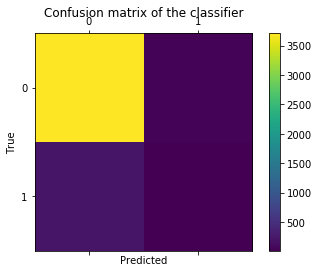

MODEL - gnb

**** RESULTS ****

F-score: 15.6643%

[[3341  421]
 [ 182   56]]

Accuracy: 84.9250%


**** CONFUSION MATRIX ****



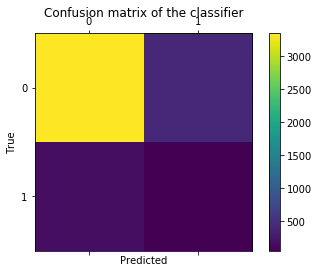

MODEL - svm1

**** RESULTS ****

F-score: 0.0000%

[[3762    0]
 [ 238    0]]

Accuracy: 94.0500%


**** CONFUSION MATRIX ****



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


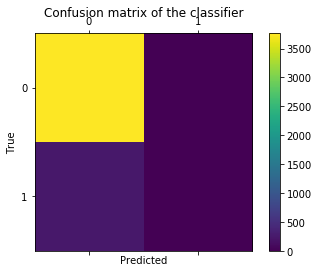

MODEL - svm2

**** RESULTS ****

F-score: 0.0000%

[[3762    0]
 [ 238    0]]

Accuracy: 94.0500%


**** CONFUSION MATRIX ****



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


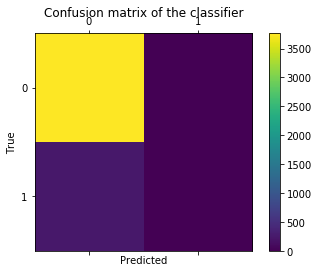

MODEL - svm3

**** RESULTS ****

F-score: 5.2770%

[[3631  131]
 [ 228   10]]

Accuracy: 91.0250%


**** CONFUSION MATRIX ****



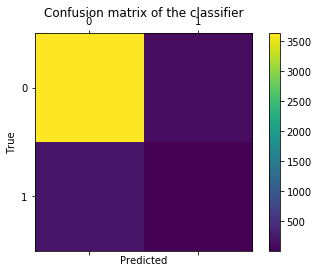

MODEL - mlp1

**** RESULTS ****

F-score: 0.0000%

[[3759    3]
 [ 238    0]]

Accuracy: 93.9750%


**** CONFUSION MATRIX ****



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


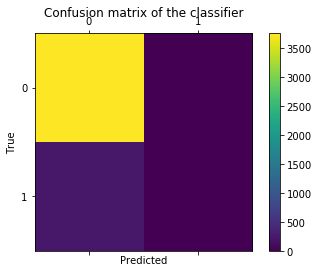

MODEL - mlp2


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


clfs = {
    'knn':KNeighborsClassifier(3),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

f1_scores = dict()
for clf_name in clfs:
    print("="*30)
    print("MODEL -", clf_name)
    print("="*30)
    clf = clfs[clf_name]
    clf.fit(X, y)
    
    print("")
    print('**** RESULTS ****')
    print("")
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(coil_target['CARAVAN'], y_pred)
    print("F-score: {:.4%}".format(f1_scores[clf_name]))
    print("")
    
    cm = confusion_matrix(coil_target['CARAVAN'],y_pred)
    print(cm)
    print("")
    accuracy = (cm[0][0]+cm[1][1])/np.sum(cm)
    print("Accuracy: {:.4%}".format(accuracy))
    print("")
    
    print("")
    print('**** CONFUSION MATRIX ****')
    print("")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  
    
    
#f1_scores